# Project Overview:
# The project focuses on predicting customer churn for a fictitious telecommunications company using machine learning techniques. The dataset used in this project contains various customer-related features, including tenure, monthly charges, total charges, and several categorical variables related to services subscribed by the customers.

 Data Cleaning:

 Loaded the dataset ('churn.csv') into a Pandas DataFrame.
 Checked for missing values and dropped rows with missing values.
 Converted the 'SeniorCitizen' column to a string type.
 Removed rows with missing 'TotalCharges'.
 Converted specific columns related to services to categorical variables.
 Handled unique values in 'MonthlyCharges' and 'TotalCharges' columns, converting them to integers.

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [39]:
db_churn = pd.read_csv("C:\\Users\\Abhishek\\Downloads\\churn.csv")

In [40]:
db_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
db_churn=db_churn.dropna()

In [42]:
db_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [43]:
# Convert SeniorCitizen to factor
db_churn['SeniorCitizen'] = db_churn['SeniorCitizen'].astype('str')

In [44]:
db_churn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
# Remove rows with missing TotalCharges
#db_churn = db_churn.dropna(subset=['TotalCharges'])

In [46]:
db_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
### Convert specific columns to factors
cols_to_convert = ['InternetService','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']  # Replace with actual column names
db_churn[cols_to_convert] = db_churn[cols_to_convert].apply(lambda x: np.where(x == "No internet service", "No", x))
db_churn[cols_to_convert] = db_churn[cols_to_convert].apply(lambda x: np.where(x == "No phone service", "No", x))
db_churn[cols_to_convert] = db_churn[cols_to_convert].astype('category')


In [48]:
#Feature Engineering:

#Created dummy variables for categorical columns using one-hot encoding.
#Selected relevant columns for analysis and modeling.

In [49]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [50]:
db_churn = pd.get_dummies(db_churn, columns=categorical_columns, drop_first=True)

In [51]:
db_churn.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.95,1889.5,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [52]:
db_churn.dtypes

customerID                                object
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                              object
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes                           uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes                            uint8
StreamingTV_Yes                            uint8
StreamingMovies_Yes                        uint8
Contract_One year                          uint8
Contract_Two year                          uint8
PaperlessBilling_Yes

In [53]:
#changing var into integer
#db_churn[['MonthlyCharges','TotalCharges']] = db_churn[['MonthlyCharges','TotalCharges']].astype(int)

In [54]:
# checking for unique values and then treating them

In [55]:
columns_to_convert = ['MonthlyCharges', 'TotalCharges']

In [56]:
for col in columns_to_convert:
    print(f"Unique values in {col}: {db_churn[col].unique()}")

Unique values in MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Unique values in TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [57]:
import pandas as pd

# Assuming 'MonthlyCharges' and 'Tenure' are the columns to be converted to int
columns_to_convert = ['MonthlyCharges', 'TotalCharges']

# Convert non-numeric values to NaN, fill NaN with 0, and then convert to int
db_churn[columns_to_convert] = db_churn[columns_to_convert].applymap(pd.to_numeric, errors='coerce').fillna(0).astype(int)


In [58]:
db_churn[['MonthlyCharges','TotalCharges']] = db_churn[['MonthlyCharges','TotalCharges']].astype(int)

In [59]:
db_churn.dtypes

customerID                               object
tenure                                    int64
MonthlyCharges                            int32
TotalCharges                              int32
gender_Male                               uint8
SeniorCitizen_1                           uint8
Partner_Yes                               uint8
Dependents_Yes                            uint8
PhoneService_Yes                          uint8
MultipleLines_Yes                         uint8
InternetService_Fiber optic               uint8
InternetService_No                        uint8
OnlineSecurity_Yes                        uint8
OnlineBackup_Yes                          uint8
DeviceProtection_Yes                      uint8
TechSupport_Yes                           uint8
StreamingTV_Yes                           uint8
StreamingMovies_Yes                       uint8
Contract_One year                         uint8
Contract_Two year                         uint8
PaperlessBilling_Yes                    

In [60]:
db_churn.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [61]:
#subsetting columns

db_churn= db_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes']]

In [62]:
db_churn.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [63]:
# Split into training and testing sets
X = db_churn.drop('Churn_Yes', axis=1)
y = db_churn['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


Modeling:
Three different models were trained and tested on the dataset:

Decision Tree Model:

Used DecisionTreeClassifier from scikit-learn.
Visualized the decision tree using the plot_tree function.
Random Forest Model:

Utilized RandomForestClassifier with 75 estimators.
Logistic Regression Model:

Applied LogisticRegression from scikit-learn.

In [64]:
# Decision Tree Model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
# Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=75)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [87]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=7)

In [88]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [89]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [90]:
# Print the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7860861334595362

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1525
           1       0.65      0.49      0.56       588

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.77      0.79      0.78      2113


Confusion Matrix:
 [[1371  154]
 [ 298  290]]


In [66]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
# Testing
y_pred_tree = dt_classifier.predict_proba(X_test)[:, 1]
y_pred_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]


Model Evaluation:

Evaluated models using Receiver Operating Characteristic (ROC) curves.
Plotted ROC curves for Decision Tree, Random Forest, and Logistic Regression models.
Calculated and compared the Area Under the Curve (AUC) for each model.

In [68]:
# ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)

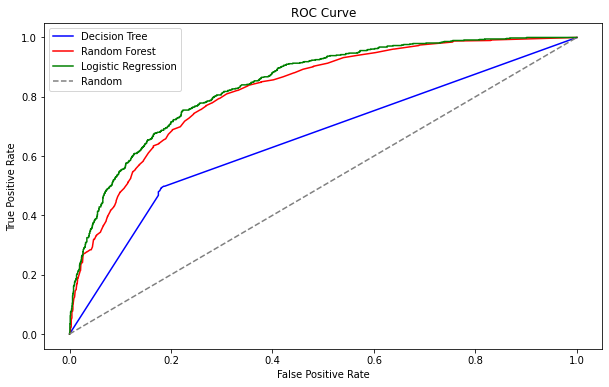

In [69]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, color='red', label='Random Forest')
plt.plot(fpr_logistic, tpr_logistic, color='green', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Statistical Summary (Logistic Regression):

Conducted logistic regression using the GLM module from the statsmodels library.
Analyzed coefficients and statistical significance of predictors.

In [70]:
import statsmodels.api as sm
lg_reg_model = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit()

lg_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.5
Date:                Mon, 11 Dec 2023   Deviance:                       4037.0
Time:                        16:44:43   Pearson chi2:                 5.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2789
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1572      0.942      0.167      0.867      -1.689       2.003
tenure                                   -0.0600      0.008     -7.892      0.000      -0.075      -0.045
MonthlyCharges                            0.0034      0.037      0.092      0.927      -0.069       0.076
TotalCharges                              0.0003   8.63e-05      3.856      0.000       0.000       0.001
gender_Male                              -0.0030      0.078     -0.038      0.969      -0.156       0.150
SeniorCitizen_1                           0.1885      0.101      1.862      0.063      -0.010       0.387
Partner_Yes                              -0.0328      0.093     -0.351      0.725      -0.216       0.150
Dependents_Yes                           -0.1564      0.108     -1.442      0.149      -0.369       0.056
PhoneService_Yes                         -0.7569      0.759     -0.997      0.319      -2.244       0.730
MultipleLines_Yes                         0.2275      0.209      1.091      0.275      -0.181       0.636
InternetService_Fiber optic               0.7077      0.935      0.757      0.449      -1.125       2.541
InternetService_No                       -0.6764      0.946     -0.715      0.475      -2.530       1.178
OnlineSecurity_Yes                       -0.5470      0.212     -2.577      0.010      -0.963      -0.131
OnlineBackup_Yes                         -0.0982      0.207     -0.474      0.636      -0.504       0.308
DeviceProtection_Yes                     -0.1254      0.207     -0.607      0.544      -0.530       0.279
TechSupport_Yes                          -0.4786      0.216     -2.218      0.027      -0.902      -0.056
StreamingTV_Yes                           0.1446      0.383      0.377      0.706      -0.607       0.896
StreamingMovies_Yes                       0.1579      0.383      0.412      0.680      -0.593       0.909
Contract_One year                        -0.7152      0.131     -5.478      0.000      -0.971      -0.459
Contract_Two year                        -1.3970      0.219     -6.375      0.000      -1.827      -0.968
PaperlessBilling_Yes                      0.2397      0.090      2.669      0.008       0.064       0.416
PaymentMethod_Credit card (automatic)    -0.0850      0.137     -0.619      0.536      -0.354       0.184
PaymentMethod_Electronic check            0.2804      0.113      2.471      0.013       0.058       0.503
PaymentMethod_Mailed check               -0.0040      0.138     -0.029      0.977      -0.275       0.267
=========================================================================================================
"""

In [71]:
pip install --upgrade scikit-learn

Decision Tree Visualization:

Created a visualization of the Decision Tree model using the plot_tree function.

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
predictions = logmodel.predict(X_test)

In [77]:
from sklearn.metrics import classification_report

In [79]:
print(predictions)

[0 1 1 ... 0 0 0]


In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1525
           1       0.69      0.53      0.60       588

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

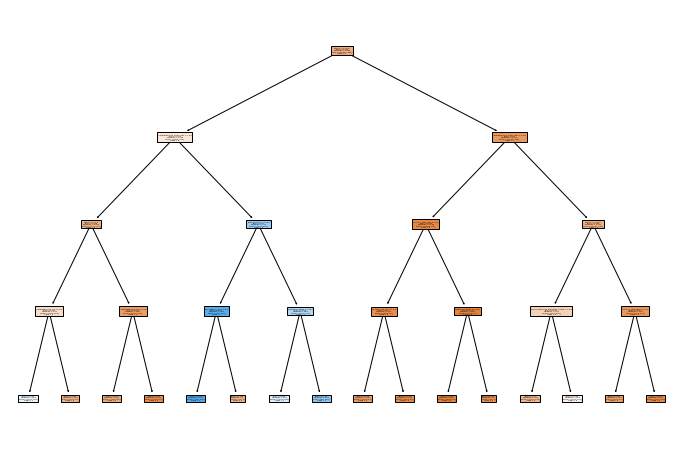

In [40]:
dt_classifier = DecisionTreeClassifier(max_depth=4)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=sorted(y.unique().astype(str)))
plt.show()

In [81]:
y_pred = dt_classifier.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [85]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7278750591575959

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1525
           1       0.51      0.48      0.50       588

    accuracy                           0.73      2113
   macro avg       0.66      0.65      0.66      2113
weighted avg       0.72      0.73      0.73      2113


Confusion Matrix:
 [[1254  271]
 [ 304  284]]


Conclusion:

The project aimed to predict customer churn using various machine learning models.
The Logistic regression model generally performed well, having the accuracy score of around 81% as evidenced by the ROC curve and AUC.
Logistic Regression provided insights into the statistical significance of predictors.
Decision Tree visualization offered interpretability for decision-making.

Recommendations:

Further model tuning and optimization could be explored to enhance predictive performance.
Continuous monitoring of model performance is recommended, especially as the dataset evolves